In [84]:
## Data Preperation Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
## KNN Library
from sklearn.neighbors import KNeighborsClassifier
## Library for plotting
import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics
### Keras and Tensor flow libraries
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

In [85]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

DATA PREPERATION

In [197]:
##### Complete Data preperation process for preparing X_train, y_train & X_test, y_test
## Importing the Dataset and applying threshold
data= pd.read_csv("Features_Variant_1.csv")
data['bin'] = np.where(data['no_of_comments']>=5, '1', '0')
test_sample=pd.read_excel("Final_Testset.xlsx")
test_sample['bin'] = np.where(test_sample['no_of_comments']>=5, '1', '0')
## Splitting the Dataset 
train_data, test_data1 = train_test_split(data, test_size = 0.3, random_state = 20)
## Final Test Data
test_data=test_data1.append(test_sample, ignore_index = True)
## data preperation
y_train=train_data['bin']
y_test=test_data['bin']
x_train=train_data[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']]
x_test=test_data[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']]
## Feature Scaling the train dataset
fea_scaling = preprocessing.StandardScaler().fit(x_train[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']])
X_train = fea_scaling.transform(x_train[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']])
## Feature scaling the test dataset
fea_scaling = preprocessing.StandardScaler().fit(x_test[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']])
X_test = fea_scaling.transform(x_test[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local']])

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


TASK 1

0.840252581635501


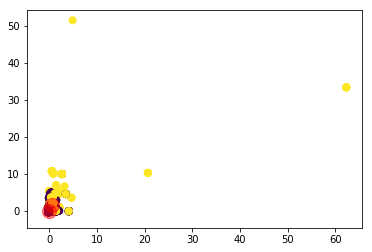

In [295]:
## K-Means Clustering Algorithm 
## Train Accuracy and Train Plot 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(X_train)):
    predict_me = np.array(X_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(X_train))
yp=kmeans.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

0.8259691381257057


Text(0.5, 1.0, 'KMeans')

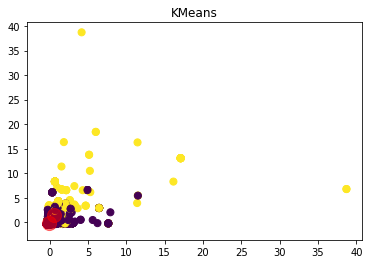

In [296]:
## Test Accuracy and Test Plot
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(X_test)):
    predict_me = np.array(X_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(X_test))
yp=kmeans.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

TASK-2-Implementing Dimensionality Reduction 

In [200]:
### Data Preperation  
xtrain=train_data.drop(columns=['bin','no_of_comments','sun_p', 'mon_p', 'tue_p', 'wed_p',
       'thu_p', 'fri_p', 'sat_p', 'sun_b', 'mon_b', 'tue_b', 'wed_b', 'thu_b',
       'fri_b', 'sat_b'],axis=1)
xtest=test_data.drop(columns=['bin','no_of_comments','sun_p', 'mon_p', 'tue_p', 'wed_p',
       'thu_p', 'fri_p', 'sat_p', 'sun_b', 'mon_b', 'tue_b', 'wed_b', 'thu_b',
       'fri_b', 'sat_b'],axis=1)
Xtrain = preprocessing.StandardScaler().fit_transform(xtrain)
Xtest = preprocessing.StandardScaler().fit_transform(xtest)
xtrain1=np.array(train_data[['sun_p', 'mon_p', 'tue_p', 'wed_p',
       'thu_p', 'fri_p', 'sat_p', 'sun_b', 'mon_b', 'tue_b', 'wed_b', 'thu_b',
       'fri_b', 'sat_b']])
xtest1=np.array(test_data[['sun_p', 'mon_p', 'tue_p', 'wed_p',
       'thu_p', 'fri_p', 'sat_p', 'sun_b', 'mon_b', 'tue_b', 'wed_b', 'thu_b',
       'fri_b', 'sat_b']])
Xtrain=np.concatenate((Xtrain,xtrain1),axis=1)
Xtest=np.concatenate((Xtest,xtest1),axis=1)

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if y is None:
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if y is None:


In [201]:
### Forward Selection 
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),  
           k_features=17,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=2)
features = feature_selector.fit(Xtrain,y_train)
filtered_features= train_data.columns[list(features.k_feature_idx_)]  
filtered_features

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from v

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 i

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 i

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 i

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 i

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 i

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 i

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 i

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 i

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 i

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 i

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   20.3s finished

[2019-05-05 19:42:26] Features: 9/17 -- score: 0.9554828963067847[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\U

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 i

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:   19.3s finished

[2019-05-05 19:43:05] Features: 11/17 -- score: 0.9561055421099526[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or inva

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  "invalid results. Use at your own risk.".format(
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   18.8s finished

[2019-05-05 19:45:01] Features: 17/17 -- score: 0.9556293947160146

Index(['page_checking', 'page_category', 'c2_min', 'c2_max', 'c2_med', 'c2_sd',
       'c5_min', 'c5_med', 'cc2', 'cc5', 'base_time', 'post_sharecount',
       'h_local', 'wed_p', 'thu_p', 'tue_b', 'thu_b'],
      dtype='object')

In [202]:
## Performing PCA, ICA and Randomized Projections
x=xtrain[['page_checking', 'page_category', 'c2_min', 'c2_max', 'c2_med', 'c2_sd',
       'c5_min', 'c5_med', 'cc2', 'cc5', 'base_time', 'post_sharecount',
       'h_local']]
xt=xtest[['page_checking', 'page_category', 'c2_min', 'c2_max', 'c2_med', 'c2_sd',
       'c5_min', 'c5_med', 'cc2', 'cc5', 'base_time', 'post_sharecount',
       'h_local']]
x= preprocessing.StandardScaler().fit_transform(x)
xt= preprocessing.StandardScaler().fit_transform(xt)
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca_train =pca.fit_transform(x)
pca_test=pca.fit_transform(xt)
from sklearn.decomposition import FastICA
ica = FastICA(n_components=12)
ica_train =ica.fit_transform(x)
ica_test=ica.fit_transform(xt)
from sklearn.random_projection import GaussianRandomProjection
rca = GaussianRandomProjection(n_components=12, eps=0.1, random_state=420)
rca_train =rca.fit_transform(x)
rca_test=rca.fit_transform(xt)

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if y is None:
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if y is None:


TASK-3 K-Means Algorithm after Dimensionality Reduction 

0.8087845380965671


Text(0.5, 1.0, 'KMeans')

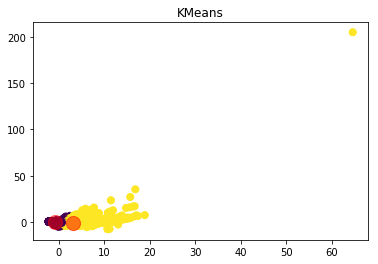

In [298]:
## K-Means Clustering Algorithm using PCA
## Train Accuracy and Train Plot 
kmeans.fit(pca_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(pca_train)):
    predict_me = np.array(pca_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(pca_train))
yp=kmeans.predict(pca_train)
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

0.8047421904403462


Text(0.5, 1.0, 'KMeans')

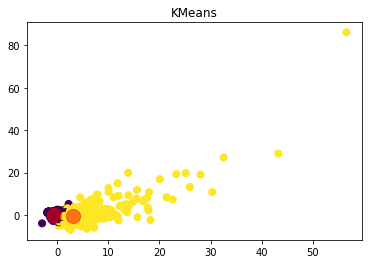

In [299]:
## Test Accuracy and Test Plot 
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(pca_test)):
    predict_me = np.array(pca_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(pca_test))
yp=kmeans.predict(pca_test)
plt.scatter(pca_test[:, 0], pca_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

0.7693273792910968


Text(0.5, 1.0, 'KMeans')

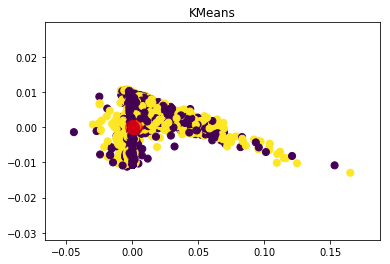

In [306]:
## K-Means Clustering Algorithm using ICA
## Train Accuracy and Train Plot 
kmeans.fit(ica_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(ica_train)):
    predict_me = np.array(ica_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(ica_train))
yp=kmeans.predict(ica_train)
plt.scatter(ica_train[:, 0], ica_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

0.8249905908919835


Text(0.5, 1.0, 'KMeans')

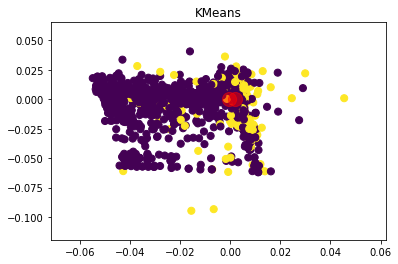

In [307]:
## Test Accuracy and Test Plot 
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(ica_test)):
    predict_me = np.array(ica_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(ica_test))
yp=kmeans.predict(ica_test)
plt.scatter(ica_test[:, 0], ica_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

0.8419620429807424


Text(0.5, 1.0, 'KMeans')

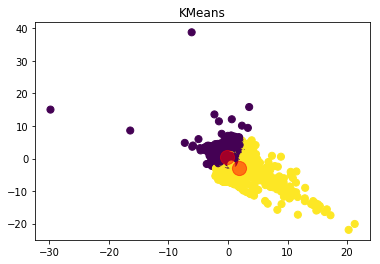

In [304]:
## K-Means Clustering Algorithm using RCA
## Train Accuracy and Train Plot 
kmeans.fit(rca_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(rca_train)):
    predict_me = np.array(rca_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(rca_train))
yp=kmeans.predict(rca_train)
plt.scatter(rca_train[:, 0], rca_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

0.826947685359428


Text(0.5, 1.0, 'KMeans')

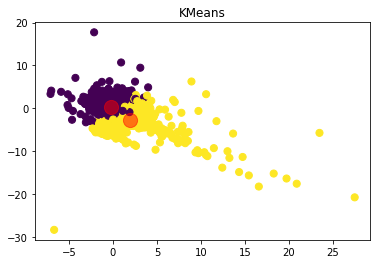

In [305]:
## Test Accuracy and Test Plot 
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(rca_test)):
    predict_me = np.array(rca_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(rca_test))
yp=kmeans.predict(rca_test)
plt.scatter(rca_test[:, 0], rca_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

TASK-4-Running Neural Networks

In [219]:
### Performing Neural Networks with RCA as it gave the best results. 

input_shap=12
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'Adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(rca_train, y_train, batch_size = 10, epochs = 10)
y_predict = classifier.predict(rca_test)
y_predict = np.where(y_predict > 0.5,1,0)
y_test_array=np.array(y_test)
y_test_array= y_test_array.astype(float)
print(confusion_matrix(y_test_array,y_predict))  
print(classification_report(y_test_array,y_predict))
acc_score=accuracy_score(y_test_array,y_predict)
print(acc_score)
y_predict_train=classifier.predict(rca_train)
y_predict_train = np.where(y_predict_train > 0.5,1,0)
y_train_array=np.array(y_train)
y_train_array= y_train_array.astype(float)
print(confusion_matrix(y_train_array,y_predict_train))  
print(classification_report(y_train_array,y_predict_train))
acc_score1=accuracy_score(y_train_array,y_predict_train)
print(acc_score1)

Epoch 1/10
28664/28664 [==============================] - 6s 211us/step - loss: 0.3213 - acc: 0.8619
Epoch 2/10
28664/28664 [==============================] - 5s 184us/step - loss: 0.2446 - acc: 0.9040
Epoch 3/10
28664/28664 [==============================] - 5s 165us/step - loss: 0.2253 - acc: 0.9111
Epoch 4/10
28664/28664 [==============================] - 5s 162us/step - loss: 0.2144 - acc: 0.9148
Epoch 5/10
28664/28664 [==============================] - 5s 161us/step - loss: 0.2070 - acc: 0.9176
Epoch 6/10
28664/28664 [==============================] - 5s 163us/step - loss: 0.2016 - acc: 0.9190
Epoch 7/10
28664/28664 [==============================] - 5s 161us/step - loss: 0.1974 - acc: 0.9202
Epoch 8/10
28664/28664 [==============================] - 5s 161us/step - loss: 0.1954 - acc: 0.9209
Epoch 9/10
28664/28664 [==============================] - 5s 166us/step - loss: 0.1942 - acc: 0.9215
Epoch 10/10
28664/28664 [==============================] - 5s 163us/step - loss: 0.1932 - a

Text(0.5, 1.0, 'Train and Test Accuracy for various Models')

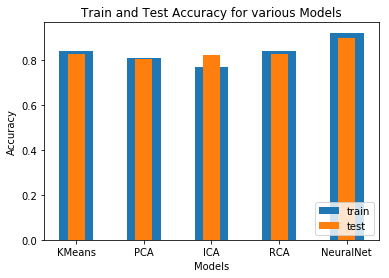

In [259]:
### Train and Test Error graph between all the algorithms
train_accuracy = [0.8403,0.8087,0.7693,0.8419,0.9221]
test_accuracy=[0.8260,0.8045,0.8240,0.8269,0.8971]
Models =['KMeans','PCA','ICA','RCA','NeuralNet']
plt.bar(Models,train_accuracy,label='train',width=0.5)
plt.bar(Models,test_accuracy,label='test',width=0.25)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Models")

Expectation Maximization-Task-1

[[22876   312]
 [ 5215   261]]
0.8071797376500139


Text(0.5, 1.0, 'Expectation Maximization')

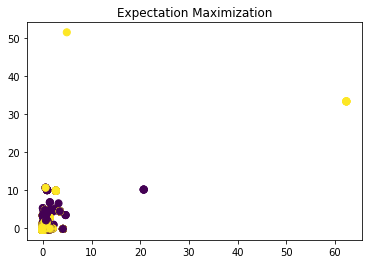

In [293]:
## Expectation maximization analysis on Train set
from sklearn.mixture import GaussianMixture
y=np.array(y_train)
y=y.astype(float)
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
em.fit(X_train)
em_pred = em.predict(X_train)
em_probs = em.predict_proba(X_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[10411   177]
 [ 2568   129]]
0.7933759879563418


Text(0.5, 1.0, 'Expectation Maximization')

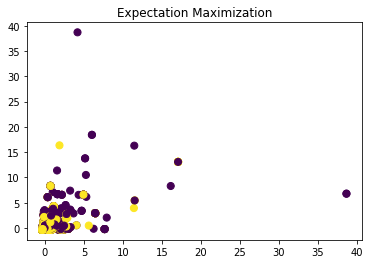

In [294]:
## Expectation maximization analysis on Test set
y=np.array(y_test)
y=y.astype(float)
em_pred1 = em.predict(X_test)
em_probs1 = em.predict_proba(X_test)
print(confusion_matrix(y,em_pred1))
print(accuracy_score(y,em_pred1))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

Task 2 is already completed

Task 3- Analysis of Expectation Maximization after Dimensionality Reduction

In [ ]:
### Analysis for pca data

[[21060  2128]
 [ 3718  1758]]
0.7960507954228301


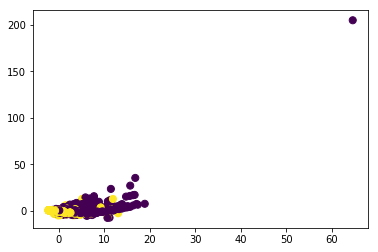

In [300]:
## Train Data
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(pca_train)
em_pred = em.predict(pca_train)
em_probs = em.predict_proba(pca_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[9817  771]
 [1869  828]]
0.8012796386902522


Text(0.5, 1.0, 'Expectation Maximization')

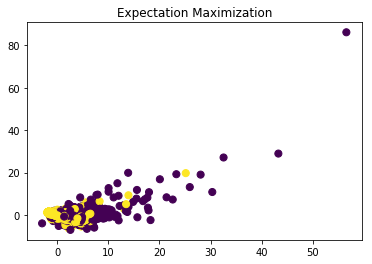

In [301]:
## Test Data 
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(pca_test)
em_probs = em.predict_proba(pca_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(pca_test[:, 0], pca_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[23123    65]
 [ 5188   288]]
0.8167387663968741


Text(0.5, 1.0, 'Expectation Maximization')

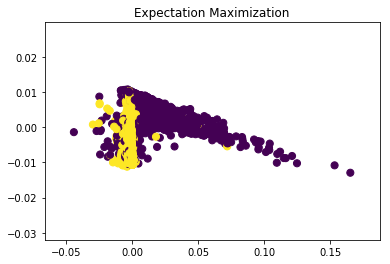

In [308]:
## Analysis of ICA
## Train Data
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(ica_train)
em_pred = em.predict(ica_train)
em_probs = em.predict_proba(ica_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(ica_train[:, 0], ica_train[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[10588     0]
 [ 2678    19]]
0.7984192698532179


Text(0.5, 1.0, 'Expectation Maximization')

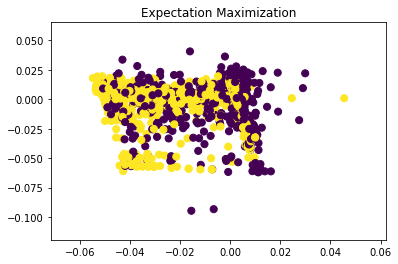

In [309]:
## Test Data
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(ica_test)
em_probs = em.predict_proba(ica_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(ica_test[:, 0], ica_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[22870   318]
 [ 5256   220]]
0.8055400502372314


Text(0.5, 1.0, 'Expectation Maximization')

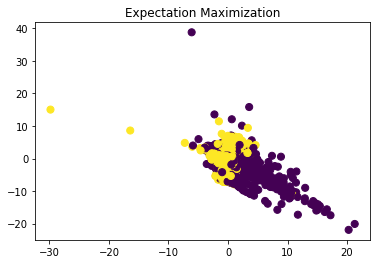

In [310]:
## Analysis of RCA
## Train Data
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(rca_train)
em_pred = em.predict(rca_train)
em_probs = em.predict_proba(rca_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(rca_train[:, 0], rca_train[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[10433   155]
 [ 2587   110]]
0.7936018065487391


Text(0.5, 1.0, 'Expectation Maximization')

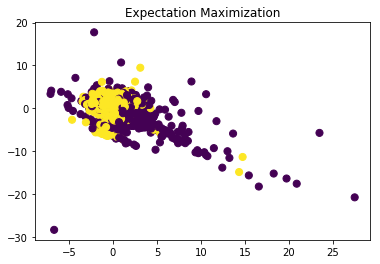

In [311]:
## Test Data
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(rca_test)
em_probs = em.predict_proba(rca_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(rca_test[:, 0], rca_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

TASK-4-Neural Networks 

In [256]:
### Performing Neural Networks with PCA as it gave the best results. 

input_shap=12
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'Adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(pca_train, y_train, batch_size = 10, epochs = 10)
y_predict = classifier.predict(pca_test)
y_predict = np.where(y_predict > 0.5,1,0)
y_test_array=np.array(y_test)
y_test_array= y_test_array.astype(float)
print(confusion_matrix(y_test_array,y_predict))  
print(classification_report(y_test_array,y_predict))
acc_score=accuracy_score(y_test_array,y_predict)
print(acc_score)
y_predict_train=classifier.predict(pca_train)
y_predict_train = np.where(y_predict_train > 0.5,1,0)
y_train_array=np.array(y_train)
y_train_array= y_train_array.astype(float)
print(confusion_matrix(y_train_array,y_predict_train))  
print(classification_report(y_train_array,y_predict_train))
acc_score1=accuracy_score(y_train_array,y_predict_train)
print(acc_score1)

Epoch 1/10
28664/28664 [==============================] - 6s 214us/step - loss: 0.2591 - acc: 0.8931
Epoch 2/10
28664/28664 [==============================] - 5s 172us/step - loss: 0.1950 - acc: 0.9214
Epoch 3/10
28664/28664 [==============================] - 5s 172us/step - loss: 0.1902 - acc: 0.9238
Epoch 4/10
28664/28664 [==============================] - 5s 171us/step - loss: 0.1874 - acc: 0.9242
Epoch 5/10
28664/28664 [==============================] - 5s 172us/step - loss: 0.1842 - acc: 0.9255
Epoch 6/10
28664/28664 [==============================] - 5s 169us/step - loss: 0.1804 - acc: 0.9266
Epoch 7/10
28664/28664 [==============================] - 5s 170us/step - loss: 0.1784 - acc: 0.9274
Epoch 8/10
28664/28664 [==============================] - 5s 169us/step - loss: 0.1772 - acc: 0.9269
Epoch 9/10
28664/28664 [==============================] - 5s 169us/step - loss: 0.1757 - acc: 0.9273
Epoch 10/10
28664/28664 [==============================] - 5s 169us/step - loss: 0.1743 - a

Text(0.5, 1.0, 'Train and Test Accuracy for various Models')

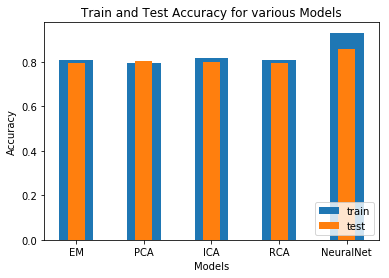

In [261]:
 ### Train and Test Error graph between all the algorithms
train_accuracy = [0.8071,0.7960,0.8167,0.8055,0.9303]
test_accuracy=[0.7934,0.8012,0.7984,0.7936,0.8553]
Models =['EM','PCA','ICA','RCA','NeuralNet']
plt.bar(Models,train_accuracy,label='train',width=0.5)
plt.bar(Models,test_accuracy,label='test',width=0.25)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Models")

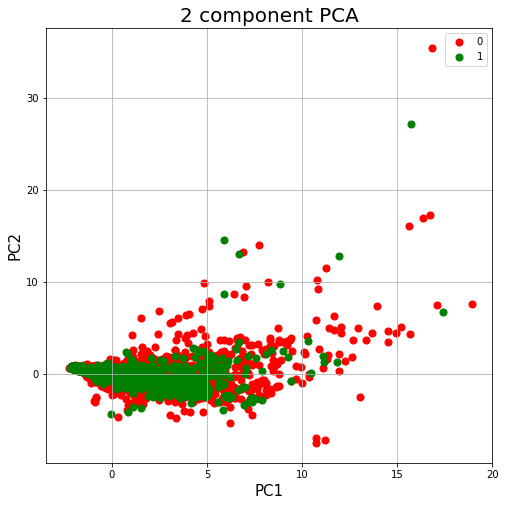

In [262]:
principalDf = pd.DataFrame(data = pca_train
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
finalDf=pd.concat([principalDf, y_train], axis = 1)
finalDf=finalDf.fillna(1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0','1']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['bin'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

TASK-5

In [270]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_train)
kmeans=kmeans.predict(pca_train)
em.fit(pca_train)
probs_em=em.predict_proba(pca_train)
new = pd.DataFrame()
d = pd.DataFrame({"KM_Pred": kmeans,"EM_Prob": probs_em[:,1],"y": y_train})
new=new.append(d)

In [274]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_test)
kmeans1=kmeans.predict(pca_test)
em.fit(pca_test)
probs_em1=em.predict_proba(pca_test)
new1 = pd.DataFrame()
d1 = pd.DataFrame({"KM_Pred": kmeans1,"EM_Prob": probs_em1[:,1],"y": y_test})
new1 = new.append(d1)

In [288]:
trainy=new.drop(columns=['KM_Pred','EM_Prob'],axis=1)
trainy=np.array(trainy)
trainy=trainy.astype(float)
testy=new1.drop(columns=['KM_Pred','EM_Prob'],axis=1)
testy=np.array(testy)
testy=testy.astype(float)

In [281]:
trainx=new.drop(columns=['y'],axis=1)
trainx=np.array(trainx)
testx=new1.drop(columns=['y'],axis=1)
testx=np.array(testx)

In [289]:
### Performing Neural Networks  

input_shap=2
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'Adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(trainx, trainy, batch_size = 10, epochs = 10)
y_predict = classifier.predict(testx)
y_predict = np.where(y_predict > 0.5,1,0)
y_test_array=np.array(testy)
y_test_array= y_test_array.astype(float)
print(confusion_matrix(y_test_array,y_predict))  
print(classification_report(y_test_array,y_predict))
acc_score=accuracy_score(y_test_array,y_predict)
print(acc_score)
y_predict_train=classifier.predict(trainx)
y_predict_train = np.where(y_predict_train > 0.5,1,0)
y_train_array=np.array(trainy)
y_train_array= y_train_array.astype(float)
print(confusion_matrix(y_train_array,y_predict_train))  
print(classification_report(y_train_array,y_predict_train))
acc_score1=accuracy_score(y_train_array,y_predict_train)
print(acc_score1)

Epoch 1/10
28664/28664 [==============================] - 6s 218us/step - loss: 0.4563 - acc: 0.8090
Epoch 2/10
28664/28664 [==============================] - 5s 174us/step - loss: 0.4308 - acc: 0.8090
Epoch 3/10
28664/28664 [==============================] - 5s 175us/step - loss: 0.4307 - acc: 0.8090
Epoch 4/10
28664/28664 [==============================] - 5s 174us/step - loss: 0.4307 - acc: 0.8077
Epoch 5/10
28664/28664 [==============================] - 5s 174us/step - loss: 0.4305 - acc: 0.8098
Epoch 6/10
28664/28664 [==============================] - 5s 173us/step - loss: 0.4306 - acc: 0.8075
Epoch 7/10
28664/28664 [==============================] - 5s 173us/step - loss: 0.4306 - acc: 0.8073
Epoch 8/10
28664/28664 [==============================] - 5s 173us/step - loss: 0.4308 - acc: 0.8090
Epoch 9/10
28664/28664 [==============================] - 5s 172us/step - loss: 0.4303 - acc: 0.8142
Epoch 10/10
28664/28664 [==============================] - 5s 174us/step - loss: 0.4299 - a

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [315]:
pca_train

array([[-1.65827193e+00,  3.51900694e-01,  3.52745210e-01, ...,
         1.59094779e-02, -1.56216646e-03, -3.51807430e-03],
       [ 3.27349755e+00, -7.66328544e-01, -1.08040715e+00, ...,
        -9.06231204e-01, -4.66475114e-01, -9.62790824e-02],
       [-1.60329730e+00,  4.71060649e-01, -9.69675725e-02, ...,
        -2.95432795e-02, -9.05745787e-03,  9.41843073e-03],
       ...,
       [-1.56829961e+00,  3.95802145e-01,  3.04998899e-01, ...,
         2.26705468e-01,  6.27012725e-03, -9.68056055e-02],
       [ 4.80757695e+00, -1.47662698e+00, -3.92796550e-01, ...,
         1.91862899e+00, -4.32799522e-01, -9.68484412e-01],
       [-1.49467518e+00,  2.92102310e-01,  3.93770238e-01, ...,
         3.47872693e-02,  2.30415146e-02,  1.02595192e-02]])